# 1. IMPORT

In [2]:
from enum import Enum
import numpy as np
import matplotlib.pyplot as plt

# 2. DEFINITIONS

## 2.1. L-System

In [5]:
class L_System:
    __slots__ = ['__variables', '__constants', '__axiom', '__rules']

    def __init__(self):
        self.__variables = set()
        self.__constants = set()
        self.__axiom = None
        self.__rules = {}
        
        return

    def add_variable(self, p_variable):
        self.__variables.add(p_variable)
        
        return

    def add_constant(self, p_constant):
        self.__constants.add(p_constant)
        
        return

    def set_axiom(self, p_axiom):
        for c in p_axiom:
            assert c in self.__variables or c in self.__constants

        self.__axiom = p_axiom
        
        return

    def add_rule(self, p_from, p_to):
        assert p_from in self.__variables
        for c in p_to:
            assert c in self.__variables or c in self.__constants

        self.__rules[p_from] = p_to
        
        return

    def eval(self, p_n):
        result = self.__axiom

        for _ in range(p_n):
            components = []

            for c in result:
                if c in self.__rules.keys():
                    components.append(self.__rules[c])
                else:
                    components.append(c)

            result = ''.join(components)
        
        return result

    def handle(self):
        pass

    def __str__(self):
        result = f'VARIABLES: {self.__variables}\n'
        result += f'CONSTANTS: {self.__constants}\n'
        result += f'AXIOM: {self.__axiom}\n'
        result += f'RULES: {self.__rules}'

        return result

    def __repr__(self):
        return self.__str__()

## 2.2. Direction

In [7]:
class Direction(Enum):
    NORTH = 0
    EAST = 1
    SOUTH = 2
    WEST = 3

    # '-' means turn left and '+' means turn right
    def rotate(self, p_sign):
        if p_sign == '+':
            return Direction((self.value + 1) % 4)
        return Direction((self.value - 1) % 4)

## 2.3. L-System code into directions

In [9]:
def L_System_2_directions(p_code, p_start_direction):
    directions = []
    last_direction = p_start_direction

    for c in p_code:
        if c in ['X', 'Y']:
            continue
            
        if c == 'F':
            directions.append(last_direction)
            continue
            
        last_direction = last_direction.rotate(c)

    return directions

## 2.4. Next point based on direction

In [11]:
def next_point(p_point, p_direction):
    match p_direction:
        case Direction.NORTH:
            return (p_point[0], p_point[1] + 1)
        case Direction.EAST:
            return (p_point[0] + 1, p_point[1])
        case Direction.SOUTH:
            return (p_point[0], p_point[1] - 1)
        case Direction.WEST:
            return (p_point[0] - 1, p_point[1])

## 2.5. Scaling factor

In [13]:
def scale_factor(p_n):
    return 2 ** p_n - 1

## 2.6. Assemly

In [15]:
def get_points(p_code, p_start_direction=Direction.NORTH):
    directions = L_System_2_directions(p_code, p_start_direction)
    points = [(0, 0)]

    for direction in directions:
        points.append(next_point(points[-1], direction))

    data = np.array(points, dtype=np.float64)
    
    return data

## 2.7. Squish

In [17]:
def squish(p_data, p_n, p_start_point=(0, 0)):
    data = p_data / scale_factor(p_n)
    
    return data + p_start_point

# 3. Examples

## 3.1. Hilbert Curve

In [20]:
hilbert_curve = L_System()

In [21]:
hilbert_curve.add_variable('X')
hilbert_curve.add_variable('Y')

In [22]:
hilbert_curve.add_constant('F')
hilbert_curve.add_constant('+')
hilbert_curve.add_constant('-')

In [23]:
hilbert_curve.set_axiom('X')

In [24]:
hilbert_curve.add_rule('X', '+YF-XFX-FY+')
hilbert_curve.add_rule('Y', '-XF+YFY+FX-')

In [25]:
N = 5

In [26]:
hilbert_data = squish(get_points(hilbert_curve.eval(N)), N)

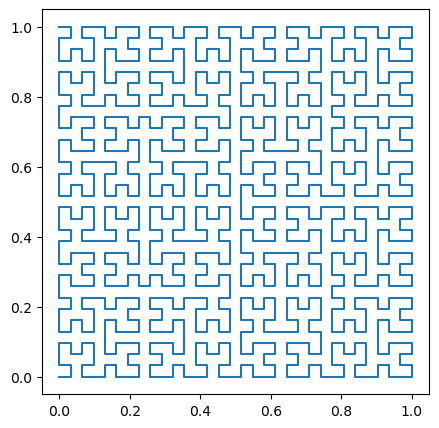

In [27]:
plt.figure(figsize=(5, 5))
plt.plot(hilbert_data[:,0], hilbert_data[:,1])

## 3.2. Peano Curve

In [29]:
peano_curve = L_System()

In [30]:
peano_curve.add_variable('F')

In [31]:
peano_curve.add_constant('+')
peano_curve.add_constant('-')

In [32]:
peano_curve.set_axiom('F')

In [33]:
peano_curve.add_rule('F', 'F+F-F-FF-F-F-FF')

In [34]:
N = 3

In [35]:
peano_data = squish(get_points(peano_curve.eval(N)), N)

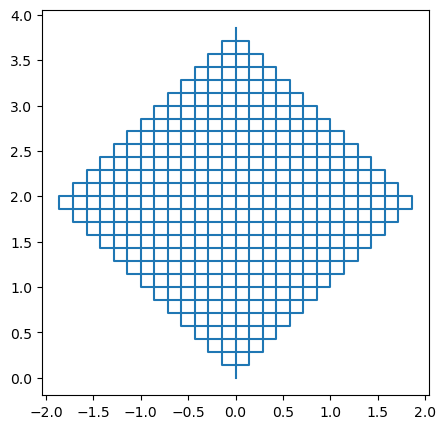

In [36]:
plt.figure(figsize=(5, 5))
plt.plot(peano_data[:,0], peano_data[:,1])